In [18]:
pip install hvplot

     |████████████████████████████████| 3.1 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 17.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 9.2 MB/s  eta 0:00:01
     |████████████████████████████████| 15.7 MB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 97 kB 7.9 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import hvplot.pandas
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import inspect
from sqlalchemy import create_engine, func

In [43]:
# File to Load 
treat_Crtl_df = "Machine Learning/ml.csv"

In [44]:
# Read the  Data and store into a Pandas DataFrame
treat_Crtl_df = pd.read_csv(treat_Crtl_df)

In [45]:
# Creating a DataFrame for treatment group
treat_Crtl_df = pd.DataFrame(treat_Crtl_df)
treat_Crtl_df

,subjectno,tooth_id,days,mean,group
0,1,110,0,1.00,1
1,1,110,30,1.00,1
2,1,110,60,1.00,1
3,1,109,0,2.00,1
4,1,109,30,2.00,1
...,...,...,...,...,...
1866,15,310,30,1.25,0
1867,15,310,60,1.25,0
1868,15,311,0,1.00,0
1869,15,311,30,1.00,0


## Logistic Regression without tooth_id

In [46]:
# seaparate features from the target
y = treat_Crtl_df["group"]
X = treat_Crtl_df.drop(["subjectno", "tooth_id"], axis=1)

In [47]:
# split data into testing and training sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    stratify=y)

X_train.shape

(1403, 3)

In [48]:
# create logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=400)  

In [49]:
# fit model w training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [50]:
# create predicitions with test set
y_pred = classifier.predict(X_test)

#view as dataframe
results_df = pd.DataFrame({"Y_Prediction": y_pred, "Actual (y-test)": y_test}).reset_index(drop=True)
results_df.head()

,Y_Prediction,Actual (y-test)
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


In [76]:
y_pred = classifier.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [52]:
# check confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
matrix_treat_Crtl_df = pd.DataFrame(matrix, 
                         index=["Actual 0-Crtl", "Actual 1-Treat"], 
                         columns=["Predicted 0-Crtl", "Predicted 1-Treat"])

matrix_treat_Crtl_df

,Predicted 0-Crtl,Predicted 1-Treat
Actual 0-Crtl,157,0
Actual 1-Treat,0,311


In [53]:
#classification report 
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       311

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468



## Logistic Regression with Tooth_id

In [54]:
# seaparate features from the target
y = treat_Crtl_df["group"]
X = treat_Crtl_df.drop(["group"], axis=1)

In [55]:
# visualize it

fig = px.scatter_3d(
    treat_Crtl_df,
    x="days",
    y="mean",
    z="group",
    hover_name ="days", 
    color="days",  
    color_continuous_scale=px.colors.diverging.balance,
    title = "Treatment vs Control Group",
    symbol="days",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1), legend_x = 0.9, legend_y = 0.1, title_x=0.5)
fig.show()

In [56]:
# seaparate features from the target
y = treat_Crtl_df["group"]
X = treat_Crtl_df.drop(["group"], axis=1)

In [57]:
# split data into testing and training sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    stratify=y)

X_train.shape

(1403, 4)

In [58]:
# create logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=400) 

In [59]:
# fit model w training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [60]:
# create predicitions with test set
y_pred = classifier.predict(X_test)

#view as dataframe
treat_Crtl_df = pd.DataFrame({"Y_Prediction": y_pred, "Actual (y-test)": y_test}).reset_index(drop=True)
treat_Crtl_df.head()

,Y_Prediction,Actual (y-test)
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


In [61]:
# evaluate accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy score from Logistic Regression is:")
print(accuracy_score(y_test, y_pred))

Accuracy score from Logistic Regression is:
1.0


In [62]:
# check confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
matrix_treat_Crtl_df = pd.DataFrame(matrix, 
                         index=["Actual 0-Crtl", "Actual 1-Treat"], 
                         columns=["Predicted 0-Crtl", "Predicted 1-Treat"])

matrix_treat_Crtl_df

,Predicted 0-Crtl,Predicted 1-Treat
Actual 0-Crtl,157,0
Actual 1-Treat,0,311


In [63]:
#classification report 
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       311

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468



In [64]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.347853
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.455      
Dependent Variable: group            AIC:              1309.6657  
Date:               2022-05-29 20:56 BIC:              1331.8026  
No. Observations:   1871             Log-Likelihood:   -650.83    
Df Model:           3                LL-Null:          -1193.2    
Df Residuals:       1867             LLR p-value:      7.3514e-235
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
subjectno     -0.5470    0.0254  -21.5151  0.0000  -0.5968  -0.4971
tooth_id       0.0091    0.0006   14.6405  0.0000

## ROC curve shows a perfect classifier

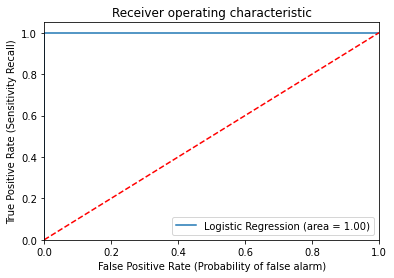

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Probability of false alarm)')
plt.ylabel('True Positive Rate (Sensitivity Recall)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()